**Problem 0**

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


**Problem 1a** (3 points)

Please load true_labels_pred_probs.csv in the data folder into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem.

Please prepare the predicted classes for a critical probability of 50% and visualize the confusion matrix.

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score,fbeta_score, f1_score, roc_curve, confusion_matrix

df_pred=pd.read_csv('data/true_labels_pred_probs.csv')


In [3]:
y_true = np.array(df_pred['y_true']) # the true classification labels of the dataset
# pred_probs_class1 is the second column of pred_probs
pred_probs_class1 = np.array(df_pred['pred_prob_class1'])
p_crit =  0.5

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 <= p_crit] = 0
y_pred[pred_probs_class1 > p_crit] = 1
df_pred['y_pred']=y_pred

df_pred.head()


,y_true,pred_prob_class0,pred_prob_class1,y_pred
0,0,0.705171,0.294829,0
1,0,0.811506,0.188494,0
2,1,0.123507,0.876493,1
3,0,0.932019,0.067981,0
4,0,0.884029,0.115971,0


In [4]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df_pred['y_true'],df_pred['y_pred']))


[[152  35]
 [ 34 179]]


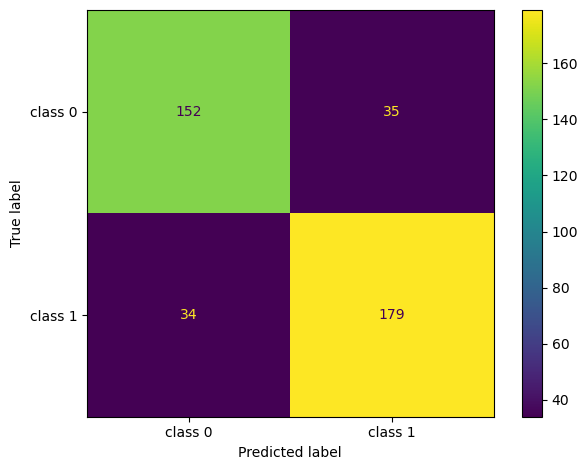

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay
# check out also https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df_pred['y_true'],df_pred['y_pred'])
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
print('accuracy',accuracy_score(df_pred['y_true'],df_pred['y_pred']))
print('recall',recall_score(df_pred['y_true'],df_pred['y_pred']))
print('precision',precision_score(df_pred['y_true'],df_pred['y_pred']))
print('f1',fbeta_score(y_true,y_pred,beta=1))

accuracy 0.8275
recall 0.8403755868544601
precision 0.8364485981308412
f1 0.8384074941451991


**Problem 1b** (9 points)

Calculate and plot the accuracy, precision, recall, f0.5, f1, f1.5 scores using the sorted predicted probabilities as critical probabilities!

What critical probability maximizes the scores (one critical probability per score)? That critical probability is what you should use to maximize the scores.

In [7]:
#create a loop that generates the graph for precision at each crit value
sorted_pcrit=df_pred['pred_prob_class1'].sort_values(ascending=True)
pcrit=df_pred['pred_prob_class1']
def gen_acc_score_list():
    acc_scor_ls=[]
    for ip_crit in pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print('precision',precision_score(df_pred['y_true'],y_pred_temp))
        acc_scor_ls.append(accuracy_score(df_pred['y_true'],y_pred_temp))
    return acc_scor_ls
    
acc_scor_ls=gen_acc_score_list()
#print(prec_scor_ls)

max_acc = max(acc_scor_ls)  # Find the maximum y value
print(max_acc)
opt_p_crit = sorted_pcrit[acc_scor_ls.index(max_acc)]  # Find the x value corresponding to the maximum y value
print(f' the best accuracy rate possible is {max_acc},and the optimal p_critical value to obtain that is {opt_p_crit}')

#create a loop that generates the graph for precision at each crit value
sorted_pcrit=df_pred['pred_prob_class1'].sort_values(ascending=True)
pcrit=df_pred['pred_prob_class1']
def gen_acc_score_list_g():
    acc_scor_ls=[]
    for ip_crit in sorted_pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print('precision',precision_score(df_pred['y_true'],y_pred_temp))
        acc_scor_ls.append(accuracy_score(df_pred['y_true'],y_pred_temp))
    return acc_scor_ls
    
acc_scor_ls_g=gen_acc_score_list_g()



0.8425
 the best accuracy rate possible is 0.8425,and the optimal p_critical value to obtain that is 0.2663314471417387


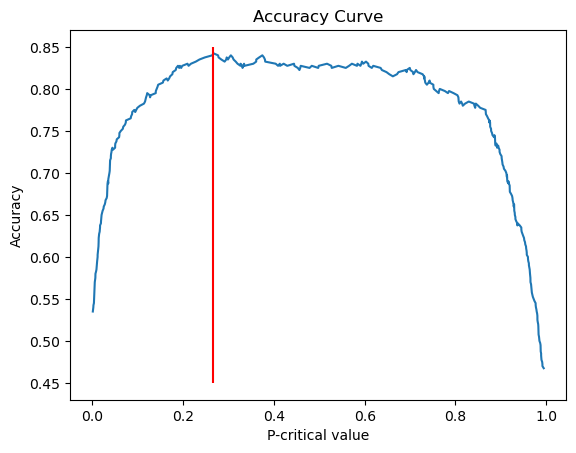

In [8]:
plt.plot(sorted_pcrit,acc_scor_ls_g)
plt.xlabel('P-critical value')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.vlines(x=0.2663314471417387, ymin=.45,ymax=.85,color='red')
plt.show()

In [9]:
#create a loop that generates the graph for precision at each crit value
sorted_pcrit=df_pred['pred_prob_class1'].sort_values(ascending=True)
def gen_prec_score_list():
    prec_scor_ls=[]
    for ip_crit in sorted_pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print('precision',precision_score(df_pred['y_true'],y_pred_temp))
        prec_scor_ls.append(precision_score(df_pred['y_true'],y_pred_temp))
    return prec_scor_ls
    
prec_scor_ls=gen_prec_score_list()


def gen_prec_score_list_g():
    prec_scor_ls=[]
    for ip_crit in pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print('precision',precision_score(df_pred['y_true'],y_pred_temp))
        prec_scor_ls.append(precision_score(df_pred['y_true'],y_pred_temp))
    return prec_scor_ls
    
prec_scor_ls_g=gen_prec_score_list_g()
max_prec = max(prec_scor_ls_g)  # Find the maximum y value
opt_p_crit = sorted_pcrit[prec_scor_ls_g.index(max_prec)]  # Find the x value corresponding to the maximum y value

print(f' the best precision rate possible is {max_prec},and the optimal p_critical value to obtain that is {opt_p_crit}')


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


 the best precision rate possible is 1.0,and the optimal p_critical value to obtain that is 0.9783435519882336


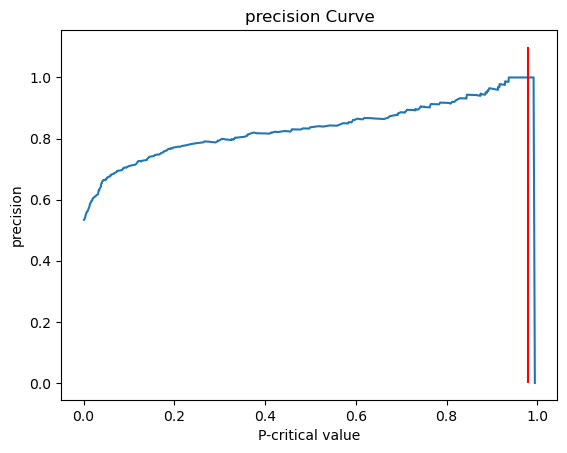

In [10]:
plt.plot(sorted_pcrit, prec_scor_ls)
plt.xlabel('P-critical value')
plt.ylabel('precision')
plt.title('precision Curve')
plt.vlines(x=0.9783435519882336,ymin=0,ymax=1.1,color='red')
plt.show()

 the best accuracy rate possible is 1.0,and the optimal p_critical value to obtain that is 0.0189289422228614


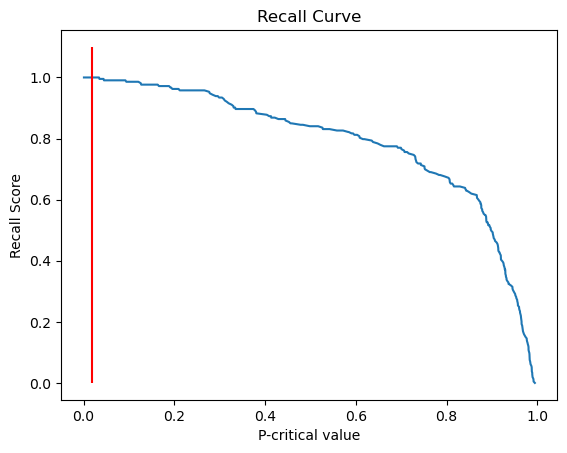

In [11]:
#graph the recall value for each p crit value
#generate the precision graph
def gen_recall_score_list():
    rec_scor_ls=[]
    for ip_crit in sorted_pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print('recalll',recall_score(df_pred['y_true'],y_pred_temp))
        rec_scor_ls.append(recall_score(df_pred['y_true'],y_pred_temp))
    return rec_scor_ls
rec_scor_ls=gen_recall_score_list()



def gen_recall_score_list_g():
    rec_scor_ls=[]
    for ip_crit in pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print('recalll',recall_score(df_pred['y_true'],y_pred_temp))
        rec_scor_ls.append(recall_score(df_pred['y_true'],y_pred_temp))
    return rec_scor_ls
rec_scor_ls_g=gen_recall_score_list_g()
max_rec = max(rec_scor_ls_g)  # Find the maximum y value
opt_p_crit = sorted_pcrit[rec_scor_ls_g.index(max_rec)]  # Find the x value corresponding to the maximum y value
print(f' the best accuracy rate possible is {max_rec},and the optimal p_critical value to obtain that is {opt_p_crit}')

plt.plot(sorted_pcrit,rec_scor_ls)
plt.vlines(x=0.0189289422228614,ymin=0,ymax=1.1,color='red')
plt.xlabel('P-critical value')
plt.ylabel('Recall Score')
plt.title('Recall Curve')
plt.show()


 the best accuracy rate possible is 0.8628081457663451,and the optimal p_critical value to obtain that is 0.7130953411781936


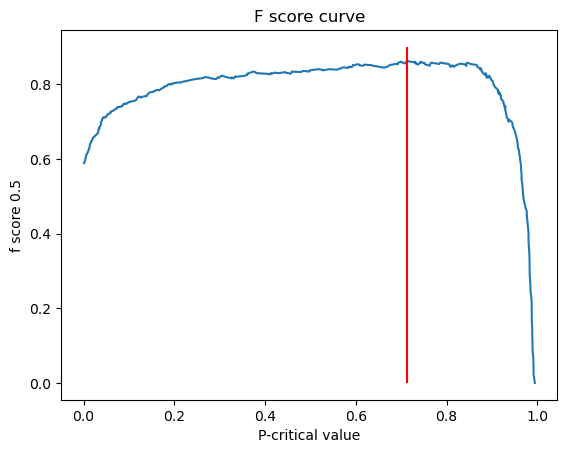

In [12]:
#generate fscore list for f0.5 using the sorted predicted probabilities as critical probabilities!


def gen_f_score_list(b):
    f_scor_ls=[]
    for ip_crit in sorted_pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print(f'fscore {b}',fbeta_score(df_pred['y_true'],y_pred_temp,beta=b))
        f_scor_ls.append(fbeta_score(df_pred['y_true'],y_pred_temp, beta=b))
    return f_scor_ls
f_scor_ls=gen_f_score_list(0.5)


def gen_f_score_list_g(b):
    f_scor_ls_g=[]
    for ip_crit in pcrit:
        y_pred_temp = np.zeros(len(pred_probs_class1),dtype=int)
        y_pred_temp[pred_probs_class1 <= ip_crit] = 0
        y_pred_temp[pred_probs_class1 > ip_crit] = 1
        df_pred[y_pred_temp]=y_pred_temp
        #print(f'fscore {b}',fbeta_score(df_pred['y_true'],y_pred_temp,beta=b))
        f_scor_ls_g.append(fbeta_score(df_pred['y_true'],y_pred_temp, beta=b))
    return f_scor_ls_g
f_scor_ls_g=gen_f_score_list_g(0.5)


max_f_05 = max(f_scor_ls_g)  # Find the maximum y value
opt_p_crit = sorted_pcrit[f_scor_ls_g.index(max_f_05)]  # Find the x value corresponding to the maximum y value
print(f' the best accuracy rate possible is {max_f_05},and the optimal p_critical value to obtain that is {opt_p_crit}')
plt.plot(sorted_pcrit,f_scor_ls)
plt.xlabel('P-critical value')
plt.ylabel('f score 0.5')
plt.title('F score curve')
plt.vlines(x=0.713095341,ymin=0,ymax=0.9,color='red')
plt.show()


 the best accuracy rate possible is 0.8662420382165605,and the optimal p_critical value to obtain that is 0.2663314471417387


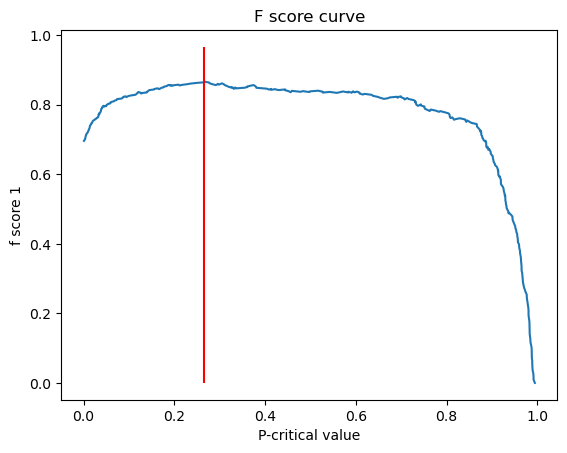

In [13]:
#f curve at 1 weight
f_scor_ls=gen_f_score_list(1)

f_scor_ls_g=gen_f_score_list_g(1)


max_f_05 = max(f_scor_ls_g)  # Find the maximum y value
opt_p_crit = sorted_pcrit[f_scor_ls_g.index(max_f_05)]  # Find the x value corresponding to the maximum y value
print(f' the best accuracy rate possible is {max_f_05},and the optimal p_critical value to obtain that is {opt_p_crit}')

plt.plot(sorted_pcrit,f_scor_ls)
plt.xlabel('P-critical value')
plt.ylabel('f score 1')
plt.title('F score curve')
plt.vlines(x=opt_p_crit,ymin=min(f_scor_ls),ymax=max(f_scor_ls)+.1,color='red')
plt.show()


 the best accuracy rate possible is 0.8992878942014241,and the optimal p_critical value to obtain that is 0.2663314471417387


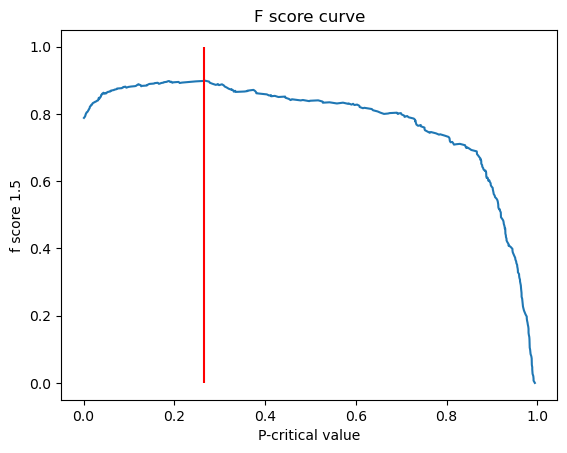

In [14]:
#f curve weight at 1.5

f_scor_ls=gen_f_score_list(1.5)
f_scor_ls_g=gen_f_score_list_g(1.5)

max_f_05 = max(f_scor_ls_g)  # Find the maximum y value
opt_p_crit = sorted_pcrit[f_scor_ls_g.index(max_f_05)]  # Find the x value corresponding to the maximum y value
print(f' the best accuracy rate possible is {max_f_05},and the optimal p_critical value to obtain that is {opt_p_crit}')

plt.plot(sorted_pcrit,f_scor_ls)
plt.xlabel('P-critical value')
plt.vlines(x=opt_p_crit,ymin=min(f_scor_ls),ymax=max(f_scor_ls)+.1,color='red')
plt.ylabel('f score 1.5')
plt.title('F score curve')
plt.show()

**Problem 1c** (3 points)

One of the curves is monotone increasing and another curve is monotone decreasing. Which evaluation metrics correspond to these two curves and why is this a problem when you try to tune the critical probability? Explain your answer in a few sentences.


Monotone increasing and decreasing is the curve only increases or decreases. The precision curve only increases while my recall curve only decreases. This is a problem because we can't just pick one of the end of the extreme for optimization. We need to find a good balance between precision and and recall. 

**Problem 2a** (5 points)

Work with true_labels_pred_probs.csv again. 

Calculate the points on the ROC curve and plot it. 

Print what is the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. 

Check out the wikipedia page of the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations) to read more about other ways to determine the best critical probability, and other ways to summarize the ROC curve.

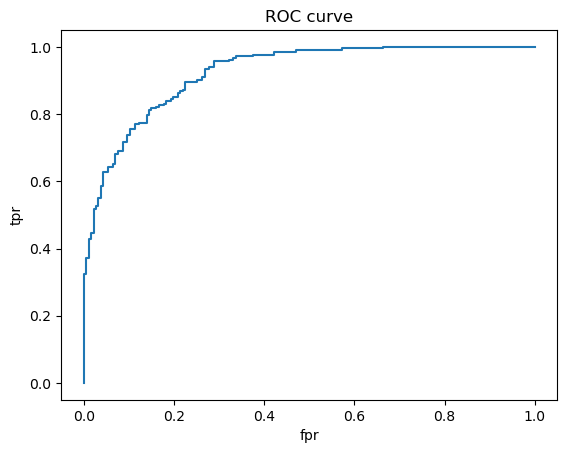

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = df_pred['y_true']
pred_prob_class1 = df_pred['pred_prob_class1']
pred_prob_class0 = df_pred['pred_prob_class0']

fpr = np.zeros(len(y_true))
tpr = np.zeros(len(y_true))

p_crits = np.sort(pred_prob_class1) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    
    y_pred = np.zeros(len(y_true))
    y_pred[pred_prob_class1 <= p_crit] = 0
    y_pred[pred_prob_class1 > p_crit] = 1
    
    C = confusion_matrix(y_true,y_pred) 
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

from sklearn.metrics import roc_curve
# # the roc_curve function performs the same calculation
fpr,tpr,p_crits = roc_curve(y_true,pred_prob_class1)

plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()



In [16]:
#create a function that find the point with the minimum distance from (0,1).
import math
def min_dist():
    target=[0,1]
    min_dist=99
    opt_point=[0,0]
    for (x,y) in zip(fpr,tpr):
        curpoint=[x,y]
        curdist=math.dist(curpoint, target)
        if min_dist>curdist:
            min_dist=curdist
            opt_point=curpoint
        else:
            continue
    return opt_point

print(min_dist())
        
    

[0.1497326203208556, 0.8169014084507042]


**Problem 2b** (10 points)

We discussed in class that the baseline accuracy of a classification model is equal to the fraction of points that belong to the most populous class. For example, if 80% of points belong to class 0 and 20% of points belong to class 1, we could predict class 0 to all points and the accuracy of our model would be 80%. Keep this concept and methodology in mind and answer the questions below.

Q1: How would you calculate the baseline f1 score in classification? Let's assume $n_0$ points are in class 0 and $n_1 = n - n_0$ points are in class 1 where $n$ is the number of points in your dataset, and $n_0 > n_1$ so class 1 is the minority class. Work out the solution on pen and paper. Express the f1 score using $p$ and $r$.

The f1 score does not consider the the true negative values. Trying to predict all point in class 0 would be impossible be because precision will be undefined. It would be diving by zero because precision only takes into account positive classifications.

A way to find the baseline would be to predict true for all points.
p=n1/n and r = n/(n1-0)

we would get:
f1=2pr/(p+r)
=2p/(p+r)
We can also express f1 in terms of class balances.
f1=2n/n(n1/n + 1)
=2n1/(n1+n)


Q2: Generalize your Q1 solution to the f_beta score. Usually the f_beta score is used when the classification problem is imbalanced. Prepare a figure which shows the baseline f_beta score for beta = 0.5, 1, and 2 when the fraction of points that belong to class 0 is between 0.95 and 1 in the target variable. Use 51 linearly spaced values between 0.95 and 1.
Create a plot with three curves, one curve per beta value. Don't forget to add axes labels and a legend.

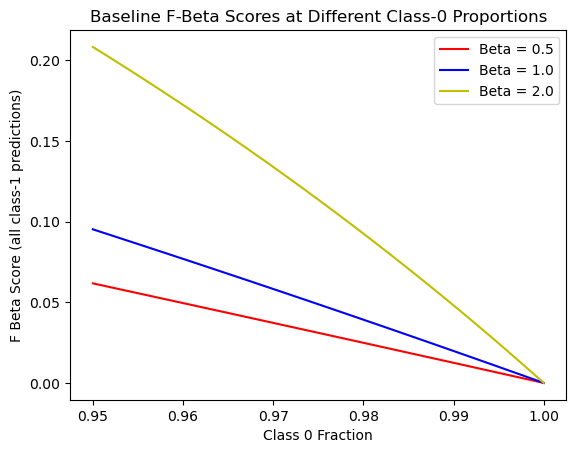

In [19]:
def f_beta_base(p: np.array, beta: float):
    return (1 + beta**2) * (p / ((p * beta**2) + 1))
plt_range = np.linspace(0.95, 1.0, 51)
fb_vals_b2 = f_beta_base(1-plt_range, 2.0)
fb_vals_b1 = f_beta_base(1-plt_range, 1)
fb_vals_b05 = f_beta_base(1-plt_range, 0.5)
plt.plot(plt_range, fb_vals_b05, c='r', label='Beta = 0.5')
plt.plot(plt_range, fb_vals_b1, c='b', label='Beta = 1.0')
plt.plot(plt_range, fb_vals_b2, c='y', label='Beta = 2.0')
plt.legend()
plt.xlabel('Class 0 Fraction')
plt.ylabel('F Beta Score (all class-1 predictions)')
plt.title('Baseline F-Beta Scores at Various Class-0 Fractions')
plt.show()

**Problem 2c** (10 points)

There are multiple ways to calculate the f1 score in a multiclass classification problem. Look up three approaches, write down how to calculate them and use equations. Create a simple toy dataset and calculate the f1 scores using sklearn. Discuss the pros and cons of each approach.

1) Macro-averaged f1 score: the f1 score is calculated by taking an unweighted average of each class' score. 

2) Weighted-average f1 score: Tathe the average of the f1 score together, each weighted by the actual number of points in the class.

3)micro-averaged f1 score: This method looks at all samples together, across classes. The true positive count will be the sum of all vaues on the diagononal of the confusion matrix. The false positives will be the sume of all values not on the diagonal. Every nnon diagonal cell is a false positives. False negatives can be interpreted as the same off-diagonal sum. This depends on which class you are predicting for. 

In [27]:
from sklearn import metrics

# Constants
C="Cat"
F="Fish"
H="Hen"

# True values
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

# Calculate Un-aggregated f1 scores
f1_raw = f1_score(y_true, y_pred, average=None)
# Calculate Macro-f1
f1_macro = f1_score(y_true, y_pred, average='macro')
# Calculate Weighted-f1
f1_wgt = f1_score(y_true, y_pred, average='weighted')
# Calculate Micro-f1
f1_micro = f1_score(y_true, y_pred, average='micro')
print(f'Individual f1 Scores: {f1_raw}')
print(f'Macro f1 Score: {f1_macro}')
print(f'Weighted f1 Score: {f1_wgt}')
print(f'Micro f1 Score: {f1_micro}')

Individual f1 Scores: [0.42105263 0.30769231 0.66666667]
Macro f1 Score: 0.46513720197930725
Weighted f1 Score: 0.46412955465587047
Micro f1 Score: 0.48


**Problem 3** (5 points)

The true and predicted target variables of a regression problem are available in the `data/reg.csv`. The goal of the model is to predict people's ages so the target variable's unit is year. 

We discussed the R2 score in class:

$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,
where $\bar{y}$ is the mean of $y$.

The baseline (or constant) regression model returns the mean of $y$ as prediction for all data points ($y_i' == \bar{y}$ for all $i$). So the baseline R2 score is 0.

Calculate what the baseline R2, MSE, RMSE, and MAE is assuming that $y_i' == \bar{y}$ for all $i$, and add the unit of each metric. 

Also calculate the R2 score, MSE, RMSE, and MAE using the model predictions and add the units of the metrics.

In [31]:
#import data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
reg_mod=pd.read_csv('data/reg.csv')

In [36]:
reg_mod['y_bar'] = reg_mod['y_true'].mean()

# R2
R2_bl = r2_score(reg_mod['y_true'], reg_mod['y_bar'])
# MSE
mse_bl = mean_squared_error(reg_mod['y_true'],
reg_mod['y_bar'])
# RMSE
rmse_bl = np.sqrt(mse_bl)
# MAE
mae_bl = mean_absolute_error(reg_mod['y_true'],reg_mod['y_bar'])
print(f'R2 Baseline: {R2_bl} [No Units]')
print(f'MSE Baseline: {np.round(mse_bl, 2)} Years^2')
print(f'RMSE Baseline: {np.round(rmse_bl, 2)} Years')
print(f'MAE Baseline: {np.round(mae_bl, 2)} Years')

R2 Baseline: 0.0 [No Units]
MSE Baseline: 589.12 Years^2
RMSE Baseline: 24.27 Years
MAE Baseline: 21.35 Years


In [38]:
# R2
R2_mod = r2_score(reg_mod['y_true'], reg_mod['y_pred'])
# MSE
mse_mod = mean_squared_error(reg_mod['y_true'],
reg_mod['y_pred'])
# RMSE
rmse_mod = np.sqrt(mse_mod)
# MAE
mae_mod = mean_absolute_error(reg_mod['y_true'],
reg_mod['y_pred'])
print(f'R2 for Model: {np.round(R2_mod, 5)} [No Units]')
print(f'MSE for Model: {np.round(mse_mod, 3)} Years**2')
print(f'RMSE for Model: {np.round(rmse_mod, 3)} Years')
print(f'MAE for Model: {np.round(mae_mod, 3)} Years')

R2 for Model: 0.85994 [No Units]
MSE for Model: 82.511 Years**2
RMSE for Model: 9.084 Years
MAE for Model: 7.211 Years
